In [1]:
import dlib
from imutils import face_utils
import imageio
import skimage
import os, random
import sys
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2gray
import cv2

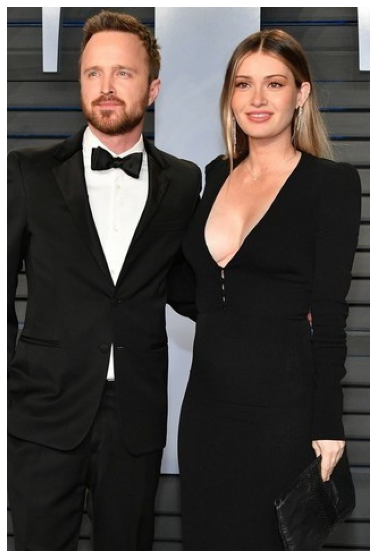

In [35]:
root_folder = os.path.dirname(os.getcwd())                  # get repo root folder
sys.path.insert(0, root_folder)                             # Add root folder to path. Needed so the DIP library can be imported.        
from DIP_Library import lpcfilter,hpcfilter,periodic_noise  # Import the DIP lib

face_folder =  root_folder + "\\resources\\imgs\\faces\\"   # appende image folder
img_name = random.choice(os.listdir(face_folder))           # random face as input
img = imageio.imread(face_folder+img_name)                  # load the image
img = skimage.util.img_as_float(img)                        # Convert image data type

Height,Width,depth = img.shape                              # Store image dimensions

plt.axis('off');plt.imshow(img, cmap = 'gray')              # Show image

In [3]:
def add_corners(pts, img):
    """Append corner and midpoint coordinates to a list of coordinates. Is compatible with lists or numpy arrays

    Args:
        pts : List of coordinations
        img  

    Returns:
        _type_: _description_
    """
    y,x,z = img.shape

    TL = [0,0]; TR =[0,y]; BL = [x,0]; BR = [x,y]           # Coordinates for the corners

    TM = [int(x/2),0];BM = [int(x/2),y]                     # Coordinates for left middle & right middle
    LM = [0,int(y/2)];RM = [x,int(y/2)]                     # Coordinates for top middle & bottom middle

    xtraPoints = np.array([TL,TR,BL,BR, LM, RM, TM, BM])    # Place them in a array to match the shape of pts
    
    if(isinstance(pts, np.ndarray)): pts = np.vstack((pts, xtraPoints))
    else: pts.append(xtraPoints)                            # Append the extra points to pts

    return pts                                              

In [25]:
def featureDetectionDLIB(image, model_path:str, corners:bool=True, npArrayOut=False):
    """generates features of detected faces from a image. Output can be either a list or a single numpy array containing all the data in a vertical array

    Args:
        image : Image containg faces
        model_path (str): Location to a trained model (.dat file)
        corners (bool, optional):   Add extra corner and midpoint coordinates 
                                    to the list containing the features. Defaults to True.
        npArrayOut (bool, optional): If true, output a numpy array instead of a list. Defaults to False

    Returns:
            A list of generated features [[img_width,img_height]:1]   
    """
    detector = dlib.get_frontal_face_detector()         # Select face detector
    predictor = dlib.shape_predictor(model_path)        # Load the trained model

    grayscale = img_as_ubyte(rgb2gray(image))           # Convert to grayscale to match model input type
    rects = detector(grayscale, upsample_num_times = 0) # Get rectangles containing faces

    if npArrayOut: pts=np.empty(shape=[0, 2])
    else: pts = []                                      # Init array that will contain features
    print(rects)

    for (i, rect) in enumerate(rects):                  # Iterate over each detected face
        shape = predictor(grayscale, rect)              # Generate the featurs of a face
        shape = face_utils.shape_to_np(shape)           # Convert to numpy array
        if npArrayOut: pts = np.vstack((pts, shape))
        else: pts.append(shape)                         # Append to the list

    if(npArrayOut): pts
    if(corners): pts = add_corners(pts,image)           # Generate extra points if needed for morphing

    return pts


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


rectangles[[(53, 29) (125, 101)], [(189, 45) (261, 117)]]
0
1


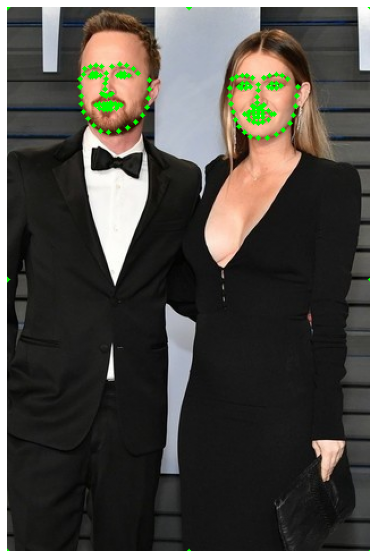

In [39]:
img = imageio.imread(face_folder+img_name)                                                                                 
img = skimage.util.img_as_float(img) 
model = root_folder + "\\resources\\Models\\shape_predictor_68_face_landmarks.dat"
#model = root_folder + "\\resources\\Models\\shape_predictor_5_face_landmarks.dat"    

points = featureDetectionDLIB(img,model, True)
for(point) in (points):
    for (x,y) in point:
        #print("x:" + str(x) + ", y:" + str(y))
        cv2.circle(img, (x, y), 2, (0, 255, 0), -1)     # Draw a circle on all points


plt.rcParams['figure.figsize'] = [10, 10];  
plt.axis('off');plt.imshow(img) 